# Régression linéaire rapide

Interpréter rapidement les résultats d'une régression linéaire.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Un cas simple

Une façon d'interpréter des résultats statistiques est de les calculer dans un cas où la réponse cherchée est connue. On simule un modèle simple $Y=\alpha X_1 + 0.X_2 + \epsilon$ et on cale une régression linéaire. On suppose que $X_1, X_2, \epsilon$ sont des variables aléatoires gaussiennes de même variance et moyenne.

In [3]:
import numpy.random as npr
eps = npr.normal(1000)
X = npr.normal(size=(1000, 3))
alpha = 2
Y = alpha * X[:,0] + X[:, 2]
X.shape, Y.shape

((1000, 3), (1000,))

In [4]:
from numpy import corrcoef
corrcoef(X.T)

array([[ 1.        , -0.01068338, -0.01481966],
       [-0.01068338,  1.        ,  0.01684629],
       [-0.01481966,  0.01684629,  1.        ]])

In [5]:
from statsmodels.regression.linear_model import OLS

In [6]:
model = OLS(Y,X[:, :2])
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1929.
Date:                Sun, 26 Nov 2017   Prob (F-statistic):               0.00
Time:                        20:05:06   Log-Likelihood:                -1411.4
No. Observations:                1000   AIC:                             2827.
Df Residuals:                     998   BIC:                             2837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9851      0.032     62.105      0.000       1.922       2.048
x2             0.0162      0.031      0.521      0.603      -0.045       0.077
==============================================================================
Omnibus:                        0.074   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.048
Skew:                          -0.016   Prob(JB):                        0.976
Kurtosis:                       3.008   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
results.rsquared, results.rsquared_adj

(0.79443989938509285, 0.79402795529568426)

On vérifie que le coefficient devant $X_1$ est non nul (P-value nulle, 0 n'est pas l'intervalle de confiance). Le coefficient devant $X_2$ n'est pas nul mais presque, la P-value est élevée, le coefficient $R^2$ est élevé. Dessinons.

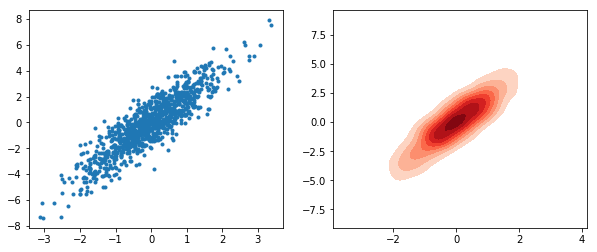

In [8]:
import matplotlib.pyplot as plt
import seaborn
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(X[:, 0], Y, '.')
seaborn.kdeplot(X[:, 0], Y, cmap="Reds", shade=True, shade_lowest=False, ax=ax[1])

## Evolution de R2

Dans la régression précédente, le coefficient $R^2$ transcrit en quelque sorte la part du bruit $\epsilon$ par rapport au terme $\alpha X_1$. Faisons varier $\alpha$.

In [9]:
alphas = []
r2s = []
for a in [0.1 * i for i in range(0, 50)]:
    Y = a*X[:,0] + X[:, 2]
    model = OLS(Y,X[:, :2])
    results = model.fit()
    alphas.append(a)
    r2s.append(results.rsquared)

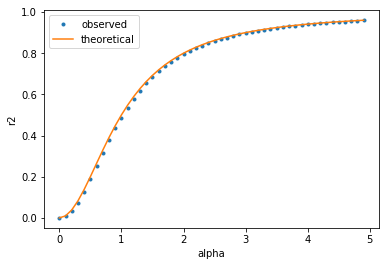

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(alphas, r2s, '.', label="observed")
ax.plot(alphas, [a**2/(1+a**2) for a in alphas], label='theoretical')
ax.set_xlabel("alpha")
ax.set_ylabel("r2")
ax.legend()

Dans ce cas de régression simple, la valeur à prédire est $y_i$, la valeur prédite est $\hat{y_i}=\alpha X_{1i}$ et la moyenne $\bar{y} = \alpha \bar{X_1} + \bar{\epsilon} = 0$.

$$R^2 = 1 - \frac{\sum_{i=1}^n (\hat{y_i}-\bar{y})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}=1-\frac{\mathbb{V}\epsilon}{\alpha^2\mathbb{V}X_1+\mathbb{V}\epsilon} = 1 - \frac{1}{1+\alpha^2}=\frac{\alpha^2}{1+\alpha^2}$$

## Deux variables corrélées

On ne change pas le modèle mais on fait en sorte que $X_2=X_1$. Les deux variables sont corrélées.

In [11]:
X[:, 1] = X[:, 0]
Y = 2*X[:,0] + X[:, 2]
model = OLS(Y,X[:, :2])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     3860.
Date:                Sun, 26 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:59:14   Log-Likelihood:                -1411.6
No. Observations:                1000   AIC:                             2825.
Df Residuals:                     999   BIC:                             2830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9925      0.016     62.125      0.000       0.961       1.024
x2             0.9925      0.016     62.125      0.000       0.961       1.024
==============================================================================
Omnibus:                        0.066   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.043
Skew:                          -0.016   Prob(JB):                        0.979
Kurtosis:                       3.006   Cond. No.                     8.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
model.rank

1

Les variables corrélées n'ont pas l'air de déranger l'algorithme de résolution car il utilise la méthode [SVD](https://en.wikipedia.org/wiki/Singular-value_decomposition) pour résoudre le même problème dans un espace de moindre dimension. Le problème survient que les deux variables ne sont pas complétement corrélées. On étudie le modèle $Y \sim X_1 + X'_2$ avec $X'_2 = \alpha X_1 + (1-\alpha) X_2$.

In [13]:
X_ = npr.normal(size=(1000, 3))

In [14]:
alphas = [0.9 + i * 0.01 for i in range(0,11)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1-a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + X[:, 2]
    model = OLS(Y,X[:, :2])
    results = model.fit()
    res.append(dict(alpha=a, r2=results.rsquared, rank=model.rank, c1=results.params[0], c2=results.params[1]))
    
import pandas
df = pandas.DataFrame(res)
df = df.set_index('alpha')
df

,c1,c2,r2,rank
alpha,,,,
0.90,0.735311,1.297124,0.782806,2
0.91,0.702297,1.330138,0.784379,2
0.92,0.661030,1.371406,0.785947,2
0.93,0.607972,1.424464,0.787510,2
0.94,0.537228,1.495207,0.789068,2
0.95,0.438186,1.594249,0.790620,2
0.96,0.289624,1.742811,0.792166,2
0.97,0.042020,1.990415,0.793706,2
0.98,-0.453187,2.485622,0.795240,2


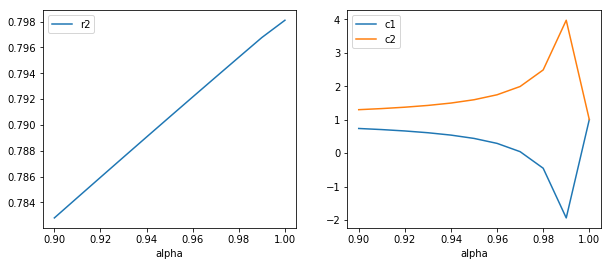

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df[["r2"]].plot(ax=ax[0])
df[["c1", "c2"]].plot(ax=ax[1])

Paradoxalement, le $r^2$ augmente quand la corrélation augmente mais les coefficients sont moins fiables. Les résultats devraient être sensiblement identiques en théorie mais en pratique, plus le déterminant devient proche de zéro, plus l'ordinateur est limité par sa précision numérique. Pour en savoir plus, vous pouvez lire un examen écrit que j'ai rédigé, en python bien sûr : [Examen Programmation ENSAE première année
2006](http://www.xavierdupre.fr/site2013/enseignements/tdnote/ecrit_2006.pdf). Cette précision est aux alentours de $10^{-15}$ ce qui correspond à la précision numérique des [double](https://en.wikipedia.org/wiki/Double-precision_floating-point_format).

In [16]:
alphas = [1 - 10**(-i) for i in range(10,18)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1-a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + X[:, 2]
    model = OLS(Y,X[:, :2])
    results = model.fit()
    res.append(dict(alpha_1=a-1, r2=results.rsquared, rank=model.rank, c1=results.params[0], c2=results.params[1]))
    
import pandas
df = pandas.DataFrame(res)
df = df.set_index('alpha_1')
df

,c1,c2,r2,rank
alpha_1,,,,
-1.000000e-10,-2.971243e+08,2.971243e+08,0.798287,2
-1.000000e-11,-2.971194e+09,2.971194e+09,0.798287,2
-9.999779e-13,-2.971147e+10,2.971147e+10,0.798287,2
-1.000311e-13,-2.965856e+11,2.965856e+11,0.798286,2
-9.992007e-15,-2.945217e+12,2.945217e+12,0.798283,2
-9.992007e-16,1.001963e+00,1.001963e+00,0.798103,2
-1.110223e-16,1.001963e+00,1.001963e+00,0.798103,1
0.000000e+00,1.001963e+00,1.001963e+00,0.798103,1


## Indicatrices

$X_1$ est une variable aléatoire gaussienne. On teste maintenant un modèle $Y = X'_1 + X'_2 + \epsilon$ avec $X'_1 = X_1 \mathbb{1}_{X_1 < 0}$ et $X'_2 = X_1 \mathbb{1}_{X_1 \geqslant 0}$.

In [17]:
X_ = npr.normal(size=(1000, 3))
X = X_.copy()
X[:, 1] = X[:, 0]
X[X_[:, 0] >= 0, 0] = 0
X[X_[:, 1] < 0, 0] = 0
Y = X[:, 0] + X[:, 1] + X[:, 2]
corrcoef(X.T)

array([[ 1.        ,  0.57717317, -0.06053515],
       [ 0.57717317,  1.        , -0.02909113],
       [-0.06053515, -0.02909113,  1.        ]])

In [18]:
model = OLS(Y,X[:, :3])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     466.2
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          3.09e-189
Time:                        00:10:37   Log-Likelihood:                -1454.7
No. Observations:                1000   AIC:                             2915.
Df Residuals:                     997   BIC:                             2930.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2985      0.091      3.288      0.001       0.120       0.477
x2             1.2267      0.072     16.956      0.000       1.085       1.369
x3            -0.2550      0.090     -2.846      0.005      -0.431      -0.079
==============================================================================
Omnibus:                        1.295   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.366
Skew:                           0.081   Prob(JB):                        0.505
Kurtosis:                       2.920   Cond. No.                         4.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On découpe en trois.

In [19]:
import numpy
X = numpy.zeros((X_.shape[0], 4))
for i in range(0, 4):
    X[:, i] = X_[:, 0]
X[:, 3] = X_[:, 2]
X[X_[:, 0] > -1, 0] = 0 
X[(X_[:, 0] < -1) | (X_[:, 0] > 1), 1] = 0 
X[X_[:, 0] < 1, 2] = 0 
corrcoef(X.T)

array([[ 1.        ,  0.01130386,  0.16873765, -0.03737533],
       [ 0.01130386,  1.        , -0.01125891, -0.00862301],
       [ 0.16873765, -0.01125891,  1.        , -0.00653343],
       [-0.03737533, -0.00862301, -0.00653343,  1.        ]])

In [20]:
model = OLS(Y,X[:, :3])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     466.2
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          3.09e-189
Time:                        00:12:31   Log-Likelihood:                -1454.7
No. Observations:                1000   AIC:                             2915.
Df Residuals:                     997   BIC:                             2930.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5252      0.055     27.801      0.000       1.418       1.633
x2             1.2267      0.072     16.956      0.000       1.085       1.369
x3             0.9717      0.053     18.392      0.000       0.868       1.075
==============================================================================
Omnibus:                        1.295   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.366
Skew:                           0.081   Prob(JB):                        0.505
Kurtosis:                       2.920   Cond. No.                         1.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ca ne change pas grand chose.